In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                sep=';')

df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                sep=';')

In [3]:
# How to model immbalanced dataset
# which model performs best
# how to do benchmarking
# conclusion

In [4]:
df = pd.concat([df_red,df_white])

In [5]:
df_red.info() 

# type of data: float64(11), int64(1)
# number of rows: 1599 entries
# col count: total 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [8]:
set(df.quality) #checking unique values from the column

{3, 4, 5, 6, 7, 8, 9}

In [9]:
# change the data type
df['quality'] = pd.Categorical(df['quality'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null category
dtypes: category(1), float64(11)
memory usage: 615.8 KB


In [11]:
set(df.quality)

{3, 4, 5, 6, 7, 8, 9}

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
set(df.quality)

{3, 4, 5, 6, 7, 8, 9}

In [14]:
# Exploratory Data Analysis

In [15]:
import seaborn as sns

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


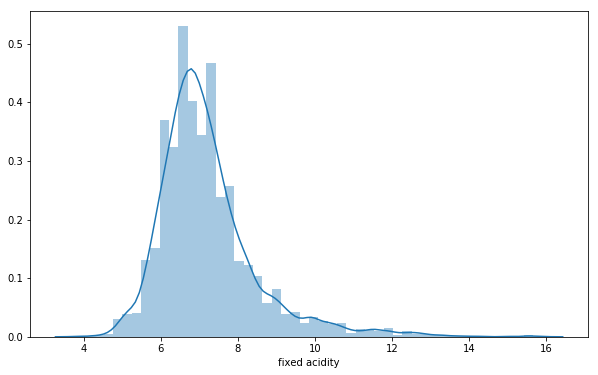

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(df['fixed acidity']) # this feature is marginally right skewed, some outlier values

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


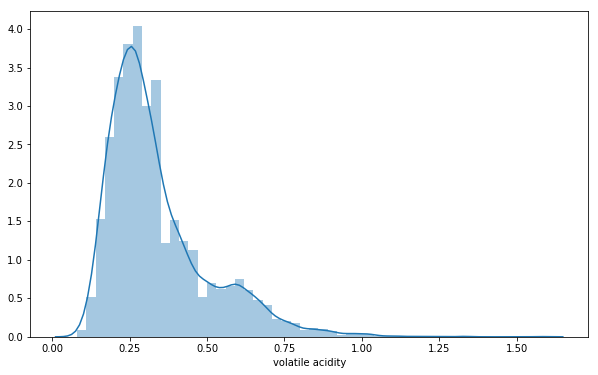

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df['volatile acidity']) # this feature is right skewed, some outlier values

In [19]:
# checking the outlier values

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


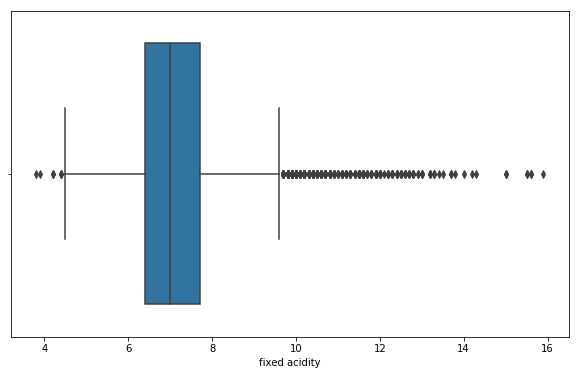

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(df['fixed acidity'])

In [21]:
# if the number of outliers less than 10%, it is ok
# if it is more than 10%, you need to cap the data points

In [22]:
df['fixed acidity'].describe()

count    6497.000000
mean        7.215307
std         1.296434
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

In [23]:
IQR = df['fixed acidity'].describe()[6] - df['fixed acidity'].describe()[4]
IQR

1.2999999999999998

In [24]:
UCL = df['residual sugar'].describe()[6] + (1.5 * IQR)
LCL = df['residual sugar'].describe()[4] - (1.5 * IQR)

In [25]:
LCL

-0.1499999999999997

In [26]:
UCL

10.049999999999999

# 5.38 % outlier on the right hand side

In [27]:
(df[(df['residual sugar'] > UCL)].shape[0]/df.shape[0])*100 # 5.38 % outlier on the right hand side

18.53162998306911

In [28]:
(df[(df['residual sugar'] < LCL)].shape[0]/df.shape[0])*100 # 0.10 % outlier on the left hand side

0.0

In [29]:
((df[(df['residual sugar'] > UCL)].shape[0]/df.shape[0])*100) + (df[(df['residual sugar'] < LCL)].shape[0]/df.shape[0])*100 

18.53162998306911

In [30]:
# skewness of the target or dependent column

In [31]:
df.quality.value_counts()/df.shape[0]

6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: quality, dtype: float64

In [32]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [33]:
# class balance by combining to the nearest class
df['quality'] = df.quality.replace({3: 4, 9: 8})

In [34]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     246
8     198
Name: quality, dtype: int64

In [35]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [36]:
# 'residual sugar' should be considered to be removed from the dataset

In [37]:
from sklearn.cross_validation import train_test_split

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 
        'residual sugar',
       'chlorides', 
        'free sulfur dioxide', 
        'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].as_matrix()
Y = df['quality'].as_matrix()

  = train_test_split(X,Y,test_size=0.20,
                                               random_state=1234)

Xtrain.shape, Xtest.shape, Ytrain.shape,Ytest.shape

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


((5197, 11), (1300, 11), (5197,), (1300,))

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model1 = LogisticRegression()

In [41]:
model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
model1.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
model1.score(Xtrain,Ytrain)
#0.539157206080431(with 11 features)
#0.5326149701751011(with 9 features)

0.539349624783529

In [44]:
model1.score(Xtest,Ytest)
#0.5376923076923077(with 11 features)
#0.53 (with 9 features)

0.5376923076923077

In [45]:
# Existence of Outliers has no role in predicting the classes of wine quality, no impact on the accuracy

In [46]:
model1.intercept_

array([ 0.02760485,  3.0672928 , -0.5830444 , -3.99239555, -2.06990039])

In [47]:
model1.coef_

array([[-3.71333318e-02,  2.65251275e+00, -2.65764480e-01,
        -4.95452233e-02, -2.60637769e-02, -5.97577345e-02,
         1.10685322e-02,  1.28127104e-02, -2.36016870e-02,
        -1.90526936e+00, -2.23229907e-01],
       [ 2.31471768e-02,  3.00092928e+00,  6.52057078e-01,
        -4.32692593e-02,  7.90273968e-01, -1.13298592e-02,
         5.94150977e-03,  3.06803692e+00,  3.50451353e-01,
        -1.14326198e+00, -8.68240911e-01],
       [ 3.13021909e-02, -2.35675906e+00, -6.46957907e-01,
         1.89928834e-02,  6.07473188e-01,  6.56762950e-03,
        -3.45059937e-03, -5.21139159e-01,  7.22366628e-02,
         3.71701467e-01,  1.19335701e-01],
       [ 1.28318298e-02, -3.36261967e+00, -4.04437271e-01,
         3.62947910e-02, -1.81811027e+00,  1.06516130e-02,
        -5.63906198e-03, -3.98861402e+00, -2.85273021e-01,
         1.54581192e+00,  7.15772472e-01],
       [-3.64860663e-01, -9.67775782e-01,  6.29312266e-01,
         5.94244498e-02, -4.14376977e-01,  2.67893690e-02,
  

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
pred_quality = model1.predict(Xtest)

In [98]:
confusion_matrix(Ytest,pred_quality)

array([[  0,  32,  14,   0,   0],
       [  0, 268, 150,   1,   0],
       [  0, 141, 413,  10,   0],
       [  0,  15, 198,  18,   0],
       [  0,   2,  37,   1,   0]])

In [99]:
print(classification_report(Ytest,pred_quality))

             precision    recall  f1-score   support

          4       0.00      0.00      0.00        46
          5       0.59      0.64      0.61       419
          6       0.51      0.73      0.60       564
          7       0.60      0.08      0.14       231
          8       0.00      0.00      0.00        40

avg / total       0.52      0.54      0.48      1300



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
# grid search to identify the best parameters of the model

In [53]:
model2 = LogisticRegression()

In [54]:
# create a function to perform grid search with cross validation and returns the accuracy values
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.grid_scores_
    return top_params

In [55]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solve

In [56]:
model2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
param_grid = {"C": [0.001,0.05,0.1],
             #"penalty": ['l2','l1'],
              'solver':['newton-cg', 'lbfgs', 'liblinear']
             }

In [58]:
from sklearn.grid_search import GridSearchCV
from time import time
from operator import itemgetter

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [59]:
top_para = GridSearch_BestParam(Xtrain,Ytrain, model2, param_grid, cv=10)
print (top_para)

[mean: 0.49394, std: 0.01189, params: {'C': 0.001, 'solver': 'newton-cg'}, mean: 0.49201, std: 0.01157, params: {'C': 0.001, 'solver': 'lbfgs'}, mean: 0.45776, std: 0.01179, params: {'C': 0.001, 'solver': 'liblinear'}, mean: 0.53261, std: 0.01260, params: {'C': 0.05, 'solver': 'newton-cg'}, mean: 0.53165, std: 0.01386, params: {'C': 0.05, 'solver': 'lbfgs'}, mean: 0.52473, std: 0.01377, params: {'C': 0.05, 'solver': 'liblinear'}, mean: 0.53762, std: 0.01028, params: {'C': 0.1, 'solver': 'newton-cg'}, mean: 0.53088, std: 0.01723, params: {'C': 0.1, 'solver': 'lbfgs'}, mean: 0.52934, std: 0.01701, params: {'C': 0.1, 'solver': 'liblinear'}]


In [60]:
top_score = sorted(top_para,key=itemgetter(1), reverse=True)
top_score

[mean: 0.53762, std: 0.01028, params: {'C': 0.1, 'solver': 'newton-cg'},
 mean: 0.53261, std: 0.01260, params: {'C': 0.05, 'solver': 'newton-cg'},
 mean: 0.53165, std: 0.01386, params: {'C': 0.05, 'solver': 'lbfgs'},
 mean: 0.53088, std: 0.01723, params: {'C': 0.1, 'solver': 'lbfgs'},
 mean: 0.52934, std: 0.01701, params: {'C': 0.1, 'solver': 'liblinear'},
 mean: 0.52473, std: 0.01377, params: {'C': 0.05, 'solver': 'liblinear'},
 mean: 0.49394, std: 0.01189, params: {'C': 0.001, 'solver': 'newton-cg'},
 mean: 0.49201, std: 0.01157, params: {'C': 0.001, 'solver': 'lbfgs'},
 mean: 0.45776, std: 0.01179, params: {'C': 0.001, 'solver': 'liblinear'}]

In [61]:
paramCV = top_score[0].parameters
paramCV

{'C': 0.1, 'solver': 'newton-cg'}

In [62]:
model_final = LogisticRegression(C=paramCV['C'], 
                                solver=paramCV['solver'])

In [63]:
model_final

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
model_final.fit(Xtrain,Ytrain)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
model_final.score(Xtrain,Ytrain)

0.542620742736194

In [66]:
model_final.score(Xtest,Ytest)

0.54

In [67]:
# Limitations: why we are not getting a good accuracy?
# class imbalance
# outliers
# interaction between features
# non-linear relationship

In [68]:
df.quality.value_counts()/df.shape[0]

6    0.436509
5    0.329075
7    0.166077
4    0.037864
8    0.030476
Name: quality, dtype: float64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [71]:
# Non-linear 

In [73]:
# Non-linear model: Decision tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
model_dt = DecisionTreeClassifier() 

In [76]:
model_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
model_dt.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
model_dt.score(Xtrain,Ytrain)

1.0

In [79]:
model_dt.score(Xtest,Ytest)

0.5884615384615385

In [80]:
param_grid = {"criterion": ["gini","entropy"],
             "min_samples_split": [10,20],
             "max_depth": [2,5,7],
             "min_samples_leaf":[10]}

In [81]:
cvDT = DecisionTreeClassifier()

In [82]:
cvDT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
top_para = GridSearch_BestParam(Xtrain,Ytrain, cvDT, param_grid, cv=10)
print (top_para)

[mean: 0.52396, std: 0.01353, params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 10}, mean: 0.52396, std: 0.01353, params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 20}, mean: 0.54358, std: 0.01441, params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}, mean: 0.54358, std: 0.01441, params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}, mean: 0.54647, std: 0.01559, params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 10}, mean: 0.54647, std: 0.01594, params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 20}, mean: 0.52145, std: 0.01593, params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 10}, mean: 0.52145, std: 0.01593, params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split'

In [84]:
top_score = sorted(top_para,key=itemgetter(1), reverse=True)
top_score

[mean: 0.54647, std: 0.01559, params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 10},
 mean: 0.54647, std: 0.01594, params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 20},
 mean: 0.54551, std: 0.01598, params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 20},
 mean: 0.54531, std: 0.01575, params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 10},
 mean: 0.54358, std: 0.01441, params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10},
 mean: 0.54358, std: 0.01441, params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20},
 mean: 0.54358, std: 0.01332, params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10},
 mean: 0.54358, std: 0.01332, params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_s

In [85]:
paramCV = top_score[0].parameters
paramCV

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [86]:
best_dtmodel = DecisionTreeClassifier(max_depth=paramCV['max_depth'], 
                                           min_samples_split=paramCV['min_samples_split'],
                                    min_samples_leaf=paramCV['min_samples_leaf'],
                                   criterion=paramCV['criterion'])
best_dtmodel

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
best_dtmodel.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
best_dtmodel.score(Xtrain,Ytrain)

0.6215124110063498

In [89]:
best_dtmodel.score(Xtest,Ytest)

0.5546153846153846

In [90]:
best_dtmodel.feature_importances_

array([0.04497174, 0.16661749, 0.01887765, 0.04792625, 0.07744303,
       0.06925625, 0.03046353, 0.0273538 , 0.03515243, 0.07933626,
       0.40260157])

In [91]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [92]:
temp = pd.DataFrame()
temp['variable'] = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
temp['VarImp'] = np.round(best_dtmodel.feature_importances_,2)

In [93]:
temp.sort_index(by='VarImp',ascending=False)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,variable,VarImp
10,alcohol,0.40
1,volatile acidity,0.17
4,chlorides,0.08
9,sulphates,0.08
5,free sulfur dioxide,0.07
3,residual sugar,0.05
0,fixed acidity,0.04
8,pH,0.04
6,total sulfur dioxide,0.03
7,density,0.03


In [95]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

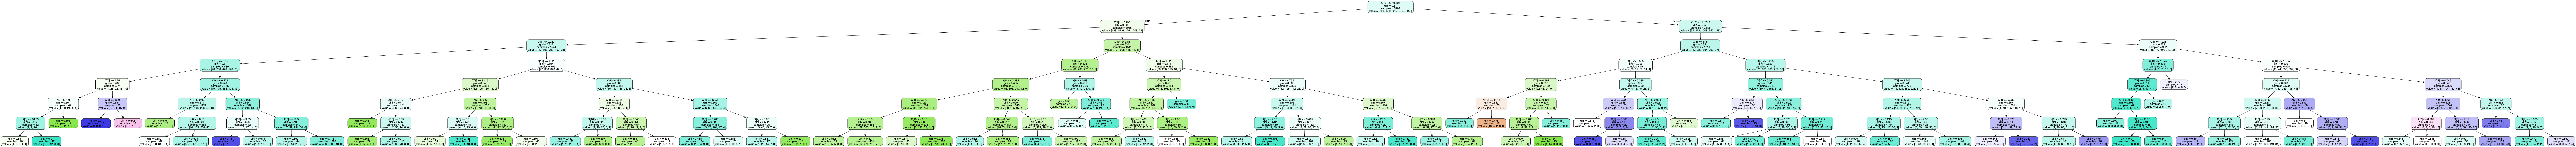

In [96]:
dot_data = tree.export_graphviz(best_dtmodel, 
                                out_file=None, 
                                filled=True, 
                                rounded=True,
                                )
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [97]:
graph.write_png('output.png')

True